In [1]:
from keras.models import load_model
from tensorflow.keras import layers
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5',compile=False)

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
image = Image.open('C:/Users/USER/Downloads/teachable machine/image/C.50472f8e-93bc-11ec-b5b2-d7dd7e02b171.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[5.0109106e-06 1.7506252e-05 8.8241512e-01 4.6958416e-03 8.7180408e-03
  2.8999215e-03 3.7887246e-05 3.1767322e-03 7.2952316e-05 2.9221640e-06
  8.5968708e-08 3.7750229e-05 9.2503078e-02 1.2979307e-08 8.9700450e-05
  4.9811895e-03 5.7142792e-08 7.9049317e-07 9.3439795e-08 1.7411128e-07
  3.5142577e-07 1.1626188e-05 1.0155246e-06 2.3326636e-05 2.0930789e-05
  2.8778287e-04]]


In [2]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_33 (Sequential)  (None, 1280)              410208    
                                                                 
 sequential_35 (Sequential)  (None, 26)                130700    
                                                                 
Total params: 540,908
Trainable params: 526,828
Non-trainable params: 14,080
_________________________________________________________________


In [5]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 1280]
[None, 26]


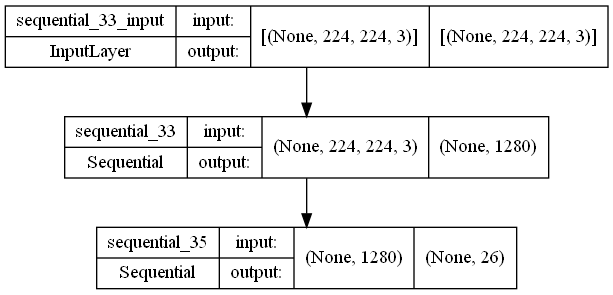

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [3]:
REV_CLASS_MAP =REV_CLASS_MAP ={0:"A",1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H",8:"I",9:"J",
                                10:"K",11:"L",12:"M",13:"N",14:"O",15:"P",16:"Q",17:"R",18:"S",19:"T",20:"U",
                                    21:"V",22:"W",23:"X",24:"Y",25:"Z"}
def mapper(val):
    return REV_CLASS_MAP[val]

In [4]:
pred = model.predict(data)
move_code = np.argmax(pred[0])
move_name = mapper(move_code)
print("Predicted:{}".format(move_name))

Predicted:C
